# Visão Computacional - Lista 2

### Alunos:
- Renalvo Alves Ferreira Júnior
- Eduardo

## Questão 1

### Harris Corner Detector

O detector de Harris é um algoritmo para a detecção de corners na imagem, através de um janela que percorre a imagem, encontrando esses corners e aplicando um threshold, marcando onde esses corners estão. Ele funciona bem em condições de mudança de iluminação e rotação.

E como parâmetros de entrada, podemos modificar o (blockSize), (ksize), e (k).
O parâmetro blockSize determina o tamanho da vizinhança considerada para a detecção dos corners. Um blockSize maior significa que mais pixels são considerados para determinar se uma região é um corner ou não.
O parâmetro ksize é o tamanho do kernel usado para calcular a derivada da imagem.
O parâmetro K é um parâmetro livre na equação. Ele determina o peso da matriz, um valor maior de k significa que mais peso é dado, o que pode afetar se uma região é classificada como um corner ou não.


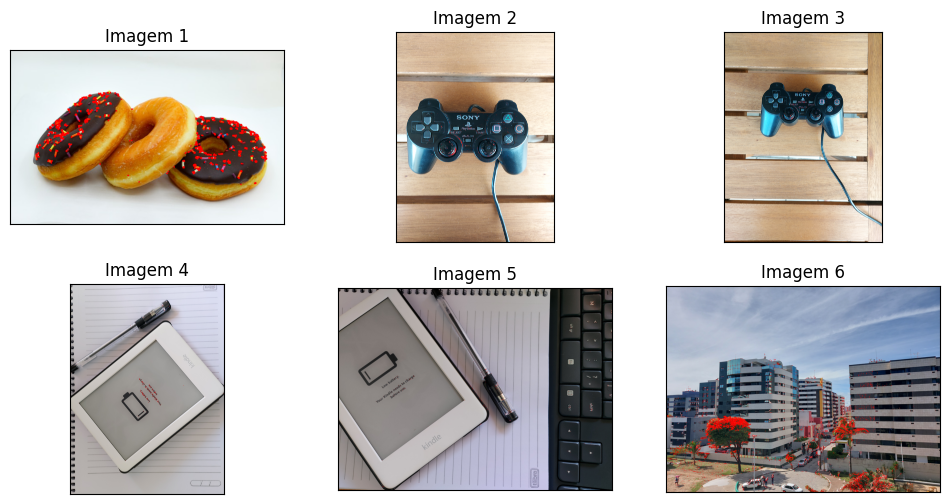

" cv2.imshow('haris_corner', resized_img)\ncv2.waitKey()\ncv2.destroyAllWindows()\n "

In [13]:
# Utilizando o detector de Harris

import cv2
import numpy as np
import matplotlib.pyplot as plt

# leia as seis imagens
img1 = cv2.imread('inputImages/donuts.jpg')
img2 = cv2.imread('inputImages/joystick.jpg')
img3 = cv2.imread('inputImages/joystick2.jpg')
img4 = cv2.imread('inputImages/kindle.jpg')
img5 = cv2.imread('inputImages/kindle2.jpg')
img6 = cv2.imread('inputImages/landscape.jpg')

# Converter para escala de cinza
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

# Aplicando o detector de Harris em cada imagem
gray1 = np.float32(gray1)
dst1 = cv2.cornerHarris(gray1, 2, 3, 0.04)
dst1 = cv2.dilate(dst1, None)
img1[dst1 > 0.01 * dst1.max()] = [0, 0, 255]

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2, 2, 3, 0.04)
dst2 = cv2.dilate(dst2, None)
img2[dst2 > 0.01 * dst2.max()] = [0, 0, 255]

gray3 = np.float32(gray3)
dst3 = cv2.cornerHarris(gray3, 2, 3, 0.04)
dst3 = cv2.dilate(dst3, None)
img3[dst3 > 0.01 * dst3.max()] = [0, 0, 255]

gray4 = np.float32(gray4)
dst4 = cv2.cornerHarris(gray4, 2, 3, 0.04)
dst4 = cv2.dilate(dst4, None)
img4[dst4 > 0.01 * dst4.max()] = [0, 0, 255]

gray5 = np.float32(gray5)
dst5 = cv2.cornerHarris(gray5, 2, 3, 0.04)
dst5 = cv2.dilate(dst5, None)
img5[dst5 > 0.01 * dst5.max()] = [0, 0, 255]

gray6 = np.float32(gray6)
dst6 = cv2.cornerHarris(gray6, 2, 3, 0.04)
dst6 = cv2.dilate(dst6, None)
img6[dst6 > 0.01 * dst6.max()] = [0, 0, 255]

# Plote as imagens em duas linhas com 3 colunas
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 1')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 2')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 3')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 4')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 5')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 6')

plt.show()

### Detector Shi-Tomasi

O detector Shi-Tomasi é uma modificação do detector de Harris que apresenta uma mudança na forma de calcular o score de cada corner. A função primeiro encontra corners na imagem e rejeita todos os corners abaixo do nível de qualidade. Em seguida, classifica os corners restantes com base na qualidade em ordem decrescente. Por fim, a função seleciona o primeiro corner mais forte, descarta todos os corners próximos no intervalo de distância mínima e retorna os N corners mais fortes. Essa modificação resulta em um melhor desempenho em comparação com o detector de Harris.


E como parâmetros de entrada, podemos modificar o (maxCorners), (qualityLevel), (minDistance), (blockSize), (k).
maxCorners: é o número máximo de corners a serem retornados. Se houver mais corners do que são encontrados, os mais forte deles são retornados.
qualityLevel: é um parâmetro que determina o nível de qualidade dos corners, todos os corners com qualidade menor que o valor máximo são rejeitados.
minDistance: é o parâmetro que determina a distância mínima entre os corners retornados.
blockSize: é o tamanho nédio de um bloco para computar a matriz de covariância derivada sobre cada vizinhança de pixel.
k - parametro livre do Harris detector.

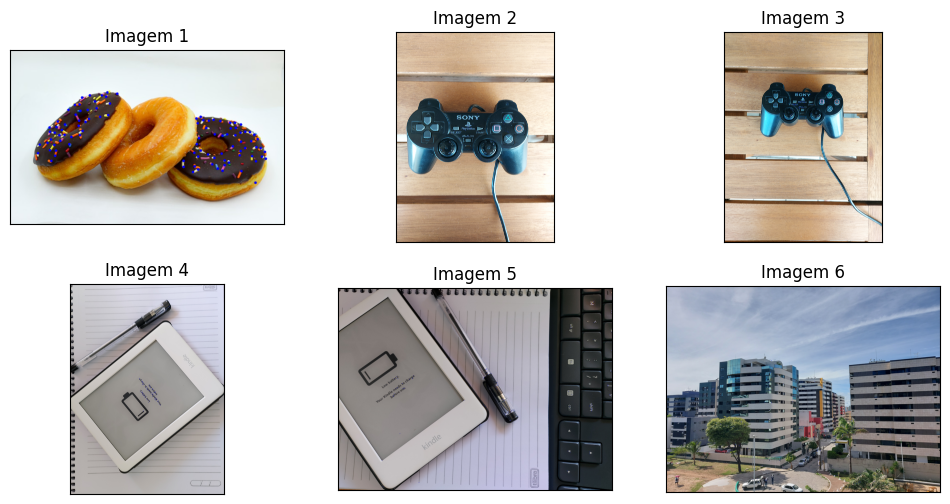

In [14]:
# Utilizando o detector Shi-Tomasi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo as imagens
img1 = cv2.imread('inputImages/donuts.jpg')
img2 = cv2.imread('inputImages/joystick.jpg')
img3 = cv2.imread('inputImages/joystick2.jpg')
img4 = cv2.imread('inputImages/kindle.jpg')
img5 = cv2.imread('inputImages/kindle2.jpg')
img6 = cv2.imread('inputImages/landscape.jpg')

# Convertendo as imagens para escala de cinza
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
gray_img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
gray_img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)
  
# Aplicando a função para os 100 melhores corners
corners1 = cv2.goodFeaturesToTrack(gray_img1, 100, 0.01, 10)
corners1 = np.intp(corners1)

corners2 = cv2.goodFeaturesToTrack(gray_img2, 100, 0.01, 10)
corners2 = np.intp(corners2)

corners3 = cv2.goodFeaturesToTrack(gray_img3, 100, 0.01, 10)
corners3 = np.intp(corners3)

corners4 = cv2.goodFeaturesToTrack(gray_img4, 100, 0.01, 10)
corners4 = np.intp(corners4)

corners5 = cv2.goodFeaturesToTrack(gray_img5, 100, 0.01, 10)
corners5 = np.intp(corners5)

corners6 = cv2.goodFeaturesToTrack(gray_img6, 100, 0.01, 10)
corners6 = np.intp(corners6)

# Desenhando círculos em torno dos corners encontrados
for i in corners1:
    x, y = i.ravel()
    cv2.circle(img1, (x, y), 3, (255, 0, 0), -1)

for i in corners2:
    x, y = i.ravel()
    cv2.circle(img2, (x, y), 3, (255, 0, 0), -1)

for i in corners3:
    x, y = i.ravel()
    cv2.circle(img3, (x, y), 3, (255, 0, 0), -1)

for i in corners4:
    x, y = i.ravel()
    cv2.circle(img4, (x, y), 3, (255, 0, 0), -1)

for i in corners5:
    x, y = i.ravel()
    cv2.circle(img5, (x, y), 3, (255, 0, 0), -1)

for i in corners6:
    x, y = i.ravel()
    cv2.circle(img6, (x, y), 3, (255, 0, 0), -1)

# Plote as imagens em duas linhas com 3 colunas
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 1')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 2')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 3')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 4')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 5')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title('Imagem 6')

plt.show()


### Fast Detector

Torne esse texto mais natural: O detector de cantos FAST é mais eficiente computacionalmente do que muitos outros métodos bem conhecidos, como Surf e Sift. Ele é útil em aplicações em tempo real, como celulares e câmeras de segurança. Foi introduzido para ter um tempo de computação muito rápido, mas ele apenas detecta keypoints e para descritores nós precisamos de outros métodos. Com o FAST podemos detectar cantos e blobs, mas não é tão robusto a altos níveis de ruído. Ele é dependente de um limiar (threshold).

threshold: O valor de threshold t é usado para classificar se um ponto p é realmente um corner, onde o valor de t é comparado com a intensidade dos pixels ao redor do ponto.
nonmaxSupression: O parâmetro nonmaxSupression é um booleano que indica se a supressão não máxima deve ser aplicada aos cantos detectados. Se isso for definido como True, então apenas máximos locais são retornados como cantos.

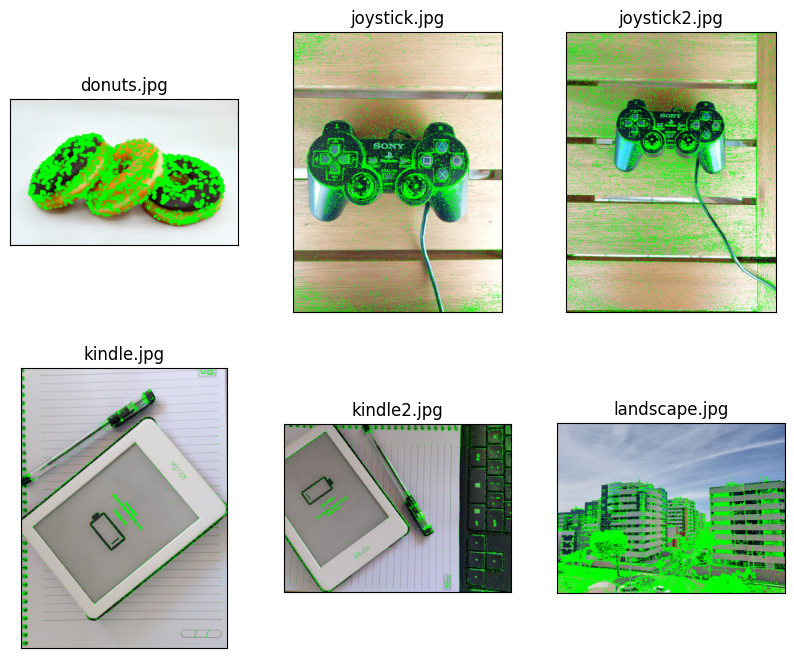

In [17]:
# Utilizando o detector FAST

import cv2
import matplotlib.pyplot as plt

# lista com os nomes das imagens
img_names = ['donuts.jpg', 'joystick.jpg', 'joystick2.jpg', 'kindle.jpg', 'kindle2.jpg', 'landscape.jpg']

# criando uma figura com duas linhas e três colunas
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# loop para processar e exibir cada imagem
for i, img_name in enumerate(img_names):
    # carregando a imagem e convertendo para escala de cinza
    img = cv2.imread('inputImages/'+img_name)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detectando os keypoints
    fast = cv2.FastFeatureDetector_create()
    fast.setNonmaxSuppression(False)
    kp = fast.detect(gray_image, None)

    # desenhando os keypoints na imagem
    kp_image = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

    # redimensionando a imagem
    resized_img = cv2.resize(kp_image, (int(kp_image.shape[1]/2), int(kp_image.shape[0]/2)))

    # exibindo a imagem
    row = i // 3
    col = i % 3
    axs[row, col].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(img_name)

plt.show()


## Questão 2

### SIFT descriptor

O Sift é um algoritmo bastante útil porque ele é invariante para escala, translação e rotação de imagens, e parcialmente invariante para mudanças de iluminação Isso significa que ele pode ser confiável para encontrar características em imagens que foram tiradas de ângulos diferentes e com iluminações diferentes.

Em relação aos parâmetros:
nfeatures - o número de melhores features a serem mantidas.
contrastThreshold - É usado para filtrar features fracas em regiões de baixo contraste. Quanto maior o limiar, menos features são detectadas.
edgeThreshold - esse parâmetro é usado para filtrar as features semelhantes as bordas. O valor padrão é 10 e se o valor for muito alto, muitas features serão descatadas.
sigma - O valor do sigma da gaussiana aplicada ao nível de entrada da oitava #0. Se a imagem for capturada com uma câmera fraca com lentes suaves, você pode querer reduzir o número.

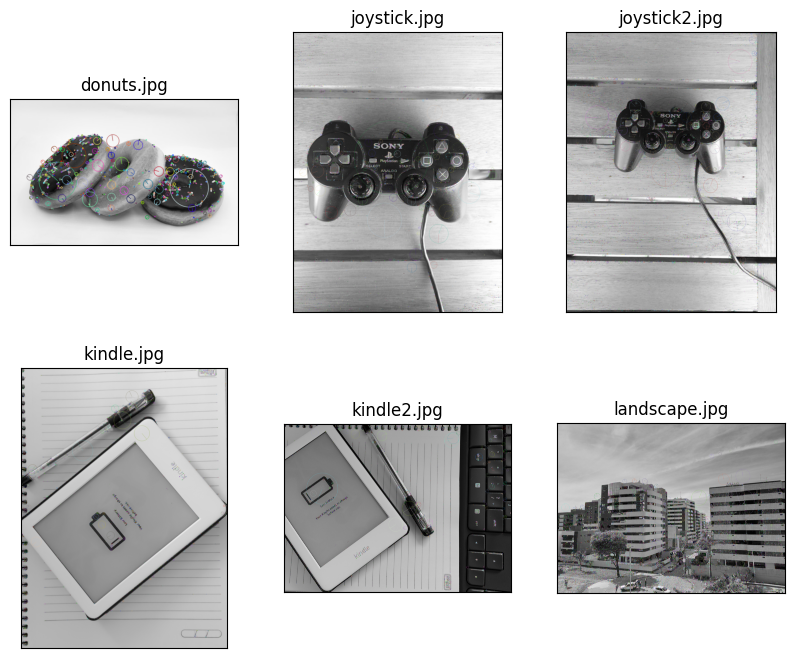

In [20]:
# Applying SIFT descriptor
import cv2
from matplotlib import pyplot as plt

# lista com os nomes das imagens
img_names = ['donuts.jpg', 'joystick.jpg', 'joystick2.jpg', 'kindle.jpg', 'kindle2.jpg', 'landscape.jpg']

# criando uma figura com duas linhas e três colunas
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# loop para processar e exibir cada imagem
for i, img_name in enumerate(img_names):
    # carregando a imagem
    img = cv2.imread('inputImages/'+img_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # criando o detector SIFT
    sift = cv2.SIFT_create()

    # detectando os keypoints e descritores
    kp, des = sift.detectAndCompute(gray, None)

    # desenhando os keypoints na imagem
    img_keypoints = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # exibindo a imagem
    row = i // 3
    col = i % 3
    axs[row, col].imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(img_name)

plt.show()


In [ ]:
# Aplicando SURF descriptor

import cv2
import matplotlib.pyplot as plt

# lista com os nomes das imagens
img_names = ['donuts.jpg', 'joystick.jpg', 'joystick2.jpg', 'kindle.jpg', 'kindle2.jpg', 'landscape.jpg']

# criando uma figura com duas linhas e três colunas
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# loop para processar e exibir cada imagem
for i, img_name in enumerate(img_names):
    # carregando a imagem
    img = cv2.imread('inputImages/'+img_name)

    # criando o detector SURF
    surf = cv2.xfeatures2d.SURF_create()

    # detectando os keypoints e descritores
    keypoints, descriptors = surf.detectAndCompute(img, None)

    # desenhando os keypoints na imagem
    img_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # exibindo a imagem
    row = i // 3
    col = i % 3
    axs[row, col].imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(img_name)

plt.show()


### ORB descriptor

ORB é mais rápido que SIFT e SURF e não é patenteado sendo uma boa alternativa, tornando-o uma boa escolha para aplicações em tempo real. ORB é uma fusão do detector FAST e do descritor BRIEF com muitas modificações para melhorar o desempenho. Ele usa o algoritmo FAST para encontrar pontos-chave e aplica a medida de canto de Harris para encontrar os N principais pontos entre eles. Ele também usa uma pirâmide para produzir recursos em várias escalas. No entanto, um problema com o FAST é que ele não calcula a orientação. Para resolver isso, o ORB calcula o centroide ponderado pela intensidade do patch com o canto localizado em seu centro. A direção do vetor desse ponto de canto ao centroide dá a orientação.

nfeatures - O número máximo de recursos a serem retidos. 
scaleFactor - Razão de decimação da pirâmide, maior que 1. 
nlevels - O número de níveis da pirâmide. 
edgeThreshold - Este é o tamanho da borda onde os recursos não são detectados. Deve ser aproximadamente igual ao patchSize. 
firstLevel - O nível da pirâmide para colocar a imagem de origem. 
WTA_K - O número de pontos que produzem cada elemento do descritor BRIEF. 
scoreType - O padrão HARRIS_SCORE significa que o algoritmo Harris é usado para classificar os recursos (a pontuação é escrita em KeyPoint::score e é usada para reter os melhores recursos nfeatures); FAST_SCORE é um valor alternativo do parâmetro que produz pontos-chave um pouco menos estáveis, mas é um pouco mais rápido de calcular. 
patchSize - Tamanho do patch usado pelo descritor BRIEF orientado. 
fastThreshold - O limite rápido. Esses parâmetros permitem controlar vários aspectos do algoritmo ORB, como quantos recursos são detectados e quão sensível ele é a bordas e cantos.

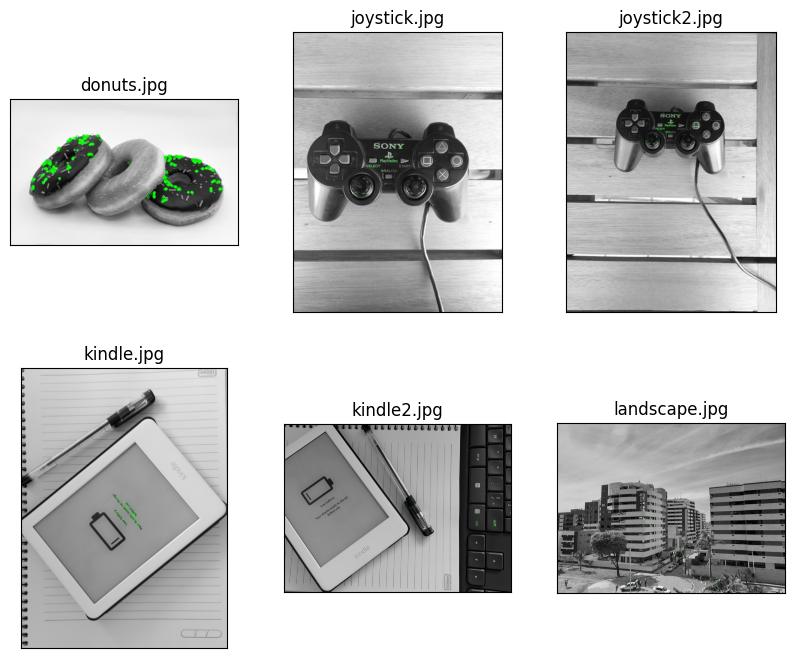

In [23]:
# Aplicando o ORB descriptor
import cv2
from matplotlib import pyplot as plt

# lista com os nomes das imagens
img_names = ['donuts.jpg', 'joystick.jpg', 'joystick2.jpg', 'kindle.jpg', 'kindle2.jpg', 'landscape.jpg']

# criando uma figura com duas linhas e três colunas
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# loop para processar e exibir cada imagem
for i, img_name in enumerate(img_names):
    # carregando a imagem
    img = cv2.imread('inputImages/'+img_name, cv2.IMREAD_GRAYSCALE)

    # criando o detector ORB
    orb = cv2.ORB_create()

    # detectando os keypoints e descritores
    kp = orb.detect(img, None)
    kp, des = orb.compute(img, kp)

    # desenhando os keypoints na imagem
    img_keypoints = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    # exibindo a imagem
    row = i // 3
    col = i % 3
    axs[row, col].imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(img_name)

plt.show()


## Questão 3

### Brute-Force Matching with ORB Descriptors
O Brute-Force Matching com descritores ORB é um método de correspondência de recursos que compara o descritor de um recurso em um conjunto com todos os outros recursos em outro conjunto usando algum cálculo de distância. O mais próximo é retornado. É uma boa escolha para aplicações em tempo real, pois é mais rápido que SIFT e SURF e não é patenteado.
A escolha entre esses métodos depende do tamanho do conjunto de dados e do tipo de descritor usado. O Brute-Force Matching com descritores ORB pode ser uma boa escolha para conjuntos de dados menores e aplicações em tempo real.

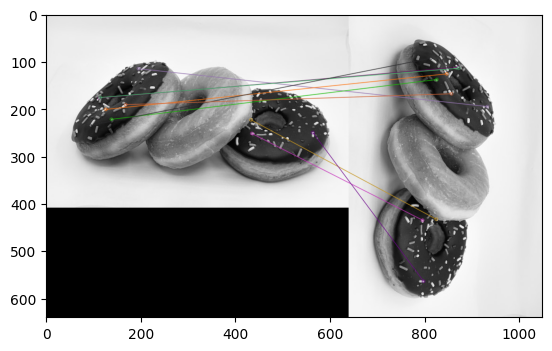

(<matplotlib.image.AxesImage at 0x164956f4490>, None)

In [29]:
# Brute-Force Matching with ORB Descriptors

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('inputImages/donuts.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('inputImages/donuts_reverse.jpg',cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Brute-Force Matching with SIFT Descriptors and Ratio Test

 é uma boa alternativa para fornecer resultados consistentes.
 Por exemplo, o SIFT é invariante à escala e rotação da imagem, enquanto o ORB é mais rápido

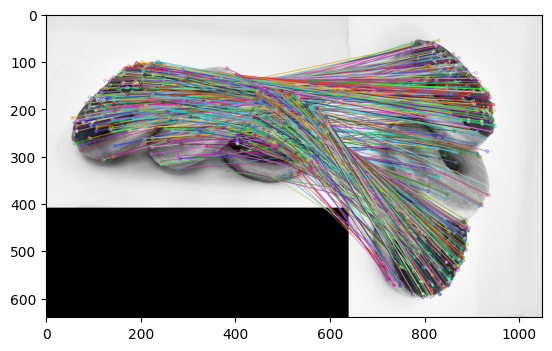

(<matplotlib.image.AxesImage at 0x164e3312510>, None)

In [4]:
# Brute-Force Matching with SIFT Descriptors and Ratio Test
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('inputImages/donuts.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('inputImages/donuts_reverse.jpg',cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### FLANN based Matcher

o FLANN based Matcher é uma boa escolha quando há a necessidade de trabalhar com grandes conjuntos de dados.

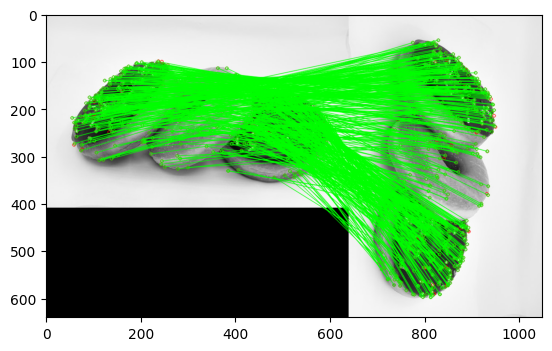

(<matplotlib.image.AxesImage at 0x164d45be810>, None)

In [7]:
# FLANN based Matcher

import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('inputImages/donuts.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('inputImages/donuts_reverse.jpg',cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()